In [111]:
# import bibliotek

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as st

In [110]:
# wczytanie danych
df = pd.read_csv("IBM_HR.csv")

# format wyświetlania danych
pd.options.display.float_format = '{:,.0f}'.format

# nowa kolumna satysfakcja ogólna
df["Satisfaction"] = (df["RelationshipSatisfaction"] + df["EnvironmentSatisfaction"] + df["JobSatisfaction"])/3

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Satisfaction
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,2
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,3
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,3
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,3
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,2


In [ ]:
list(df.columns)

# <center> Kim jesteśmy i dokąd zmierzamy (zawodowo)? </center>

<center> https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset </center>
<br>

### <center> Korelacje danych </center>

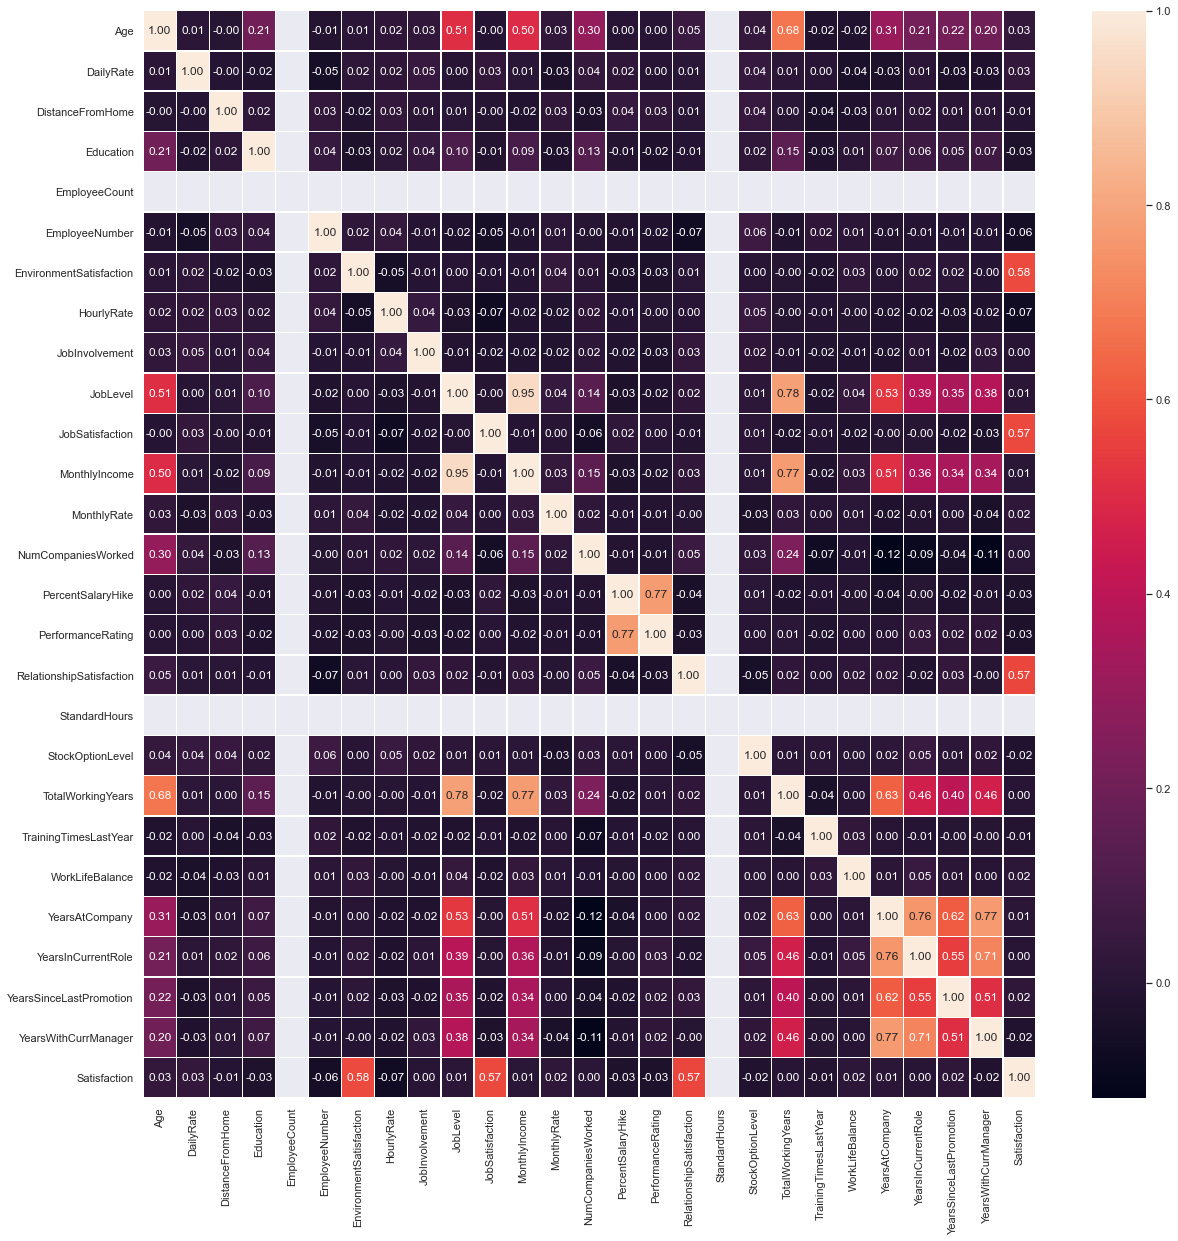

In [146]:
sns.set(font_scale=1)
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt='.2f', ax=ax)
plt.show(f,ax)

### <center> Satysfakcja w zależności od zajmowanego stanowiska oraz poziomu stanowiska </center>

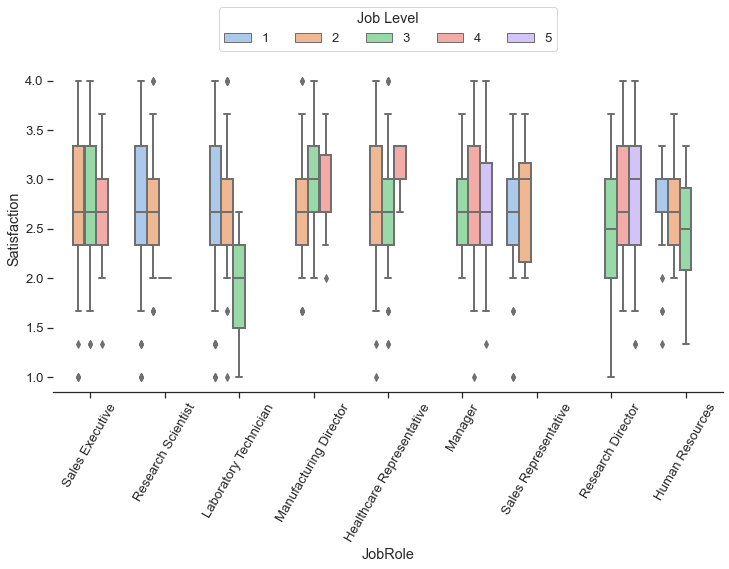

In [119]:
sns.set_theme(style="ticks", palette="pastel", font_scale=1.2)

fig = plt.figure(figsize=(12,6))

g_1=sns.boxplot(data=df,
            x=df.JobRole, y=df.Satisfaction, 
            hue=df.JobLevel, 
                whis=1,
            linewidth=2)
sns.despine(left=True)
g_1.tick_params(axis='x', rotation=60)
g_1.legend(title='Job Level', loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=5)

plt.show(g_1)

### <center> Satysfakcja w zależności od zajmowanego stanowiska oraz poziomu edukacji </center>

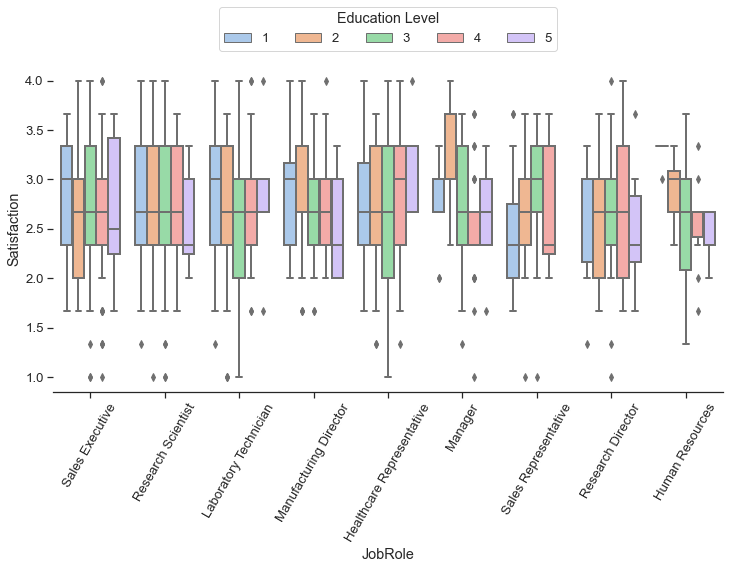

In [122]:
sns.set_theme(style="ticks", palette="pastel", font_scale=1.2)

fig = plt.figure(figsize=(12,6))

g_2=sns.boxplot(data=df,
            x=df.JobRole, y=df.Satisfaction, 
            hue=df.Education, 
                whis=1,
            linewidth=2)
sns.despine(left=True)
g_2.tick_params(axis='x', rotation=60)
g_2.legend(title='Education Level', loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=5)
plt.show(g_2)

### <center> Wynagrodzenia w zależności od zajmowanego stanowiska oraz poziomu stanowiska </center>

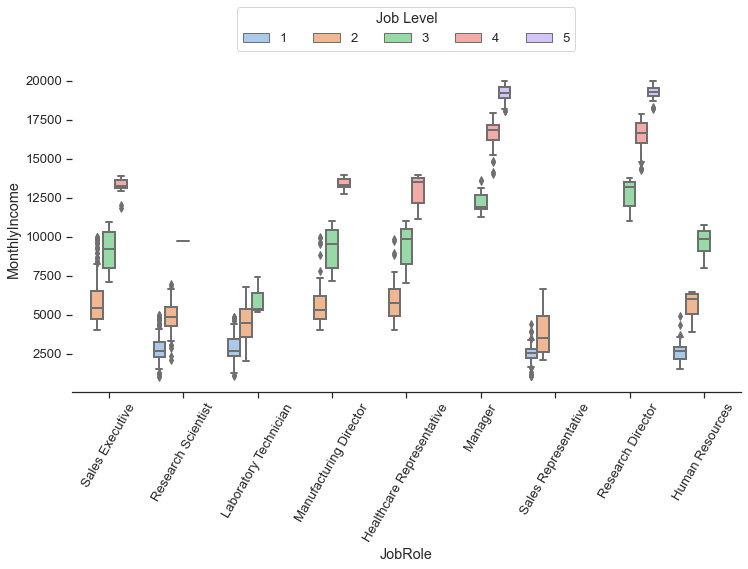

In [124]:
sns.set_theme(style="ticks", palette="pastel", font_scale=1.2)

fig = plt.figure(figsize=(12,6))

g_3=sns.boxplot(data=df,
            x=df.JobRole, y=df.MonthlyIncome, 
            hue=df.JobLevel, 
                whis=1,
            linewidth=2)
sns.despine(left=True)
g_3.tick_params(axis='x', rotation=60)
g_3.legend(title='Job Level', loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=5)
plt.show(g_3)

### <center> Wynagrodzenia w zależności od zajmowanego stanowiska oraz poziomu edukacji </center>

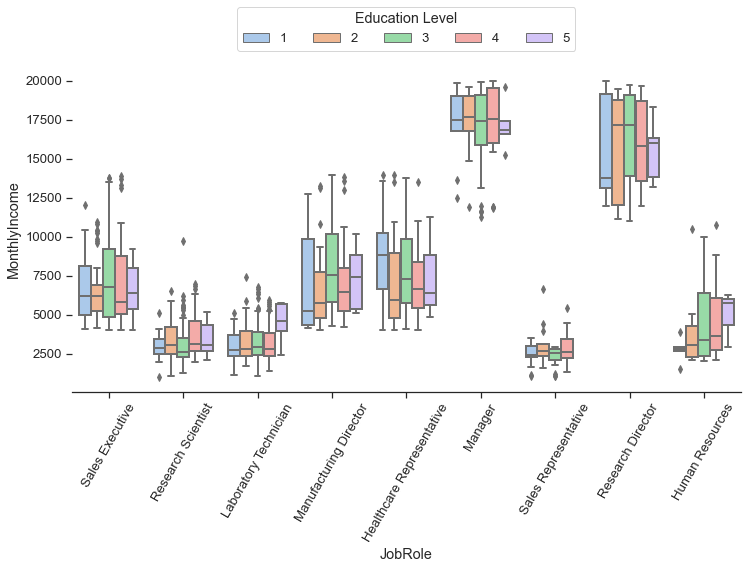

In [125]:
sns.set_theme(style="ticks", palette="pastel", font_scale=1.2)

fig = plt.figure(figsize=(12,6))

g_4=sns.boxplot(data=df,
            x=df.JobRole, y=df.MonthlyIncome, 
            hue=df.Education, 
                whis=1,
            linewidth=2)
sns.despine(left=True)
g_4.tick_params(axis='x', rotation=60)
g_4.legend(title='Education Level', loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=5)
plt.show(g_4)

### <center> Satysfakcja w zależności od zajmowanego stanowiska oraz poziomu edukacji </center>

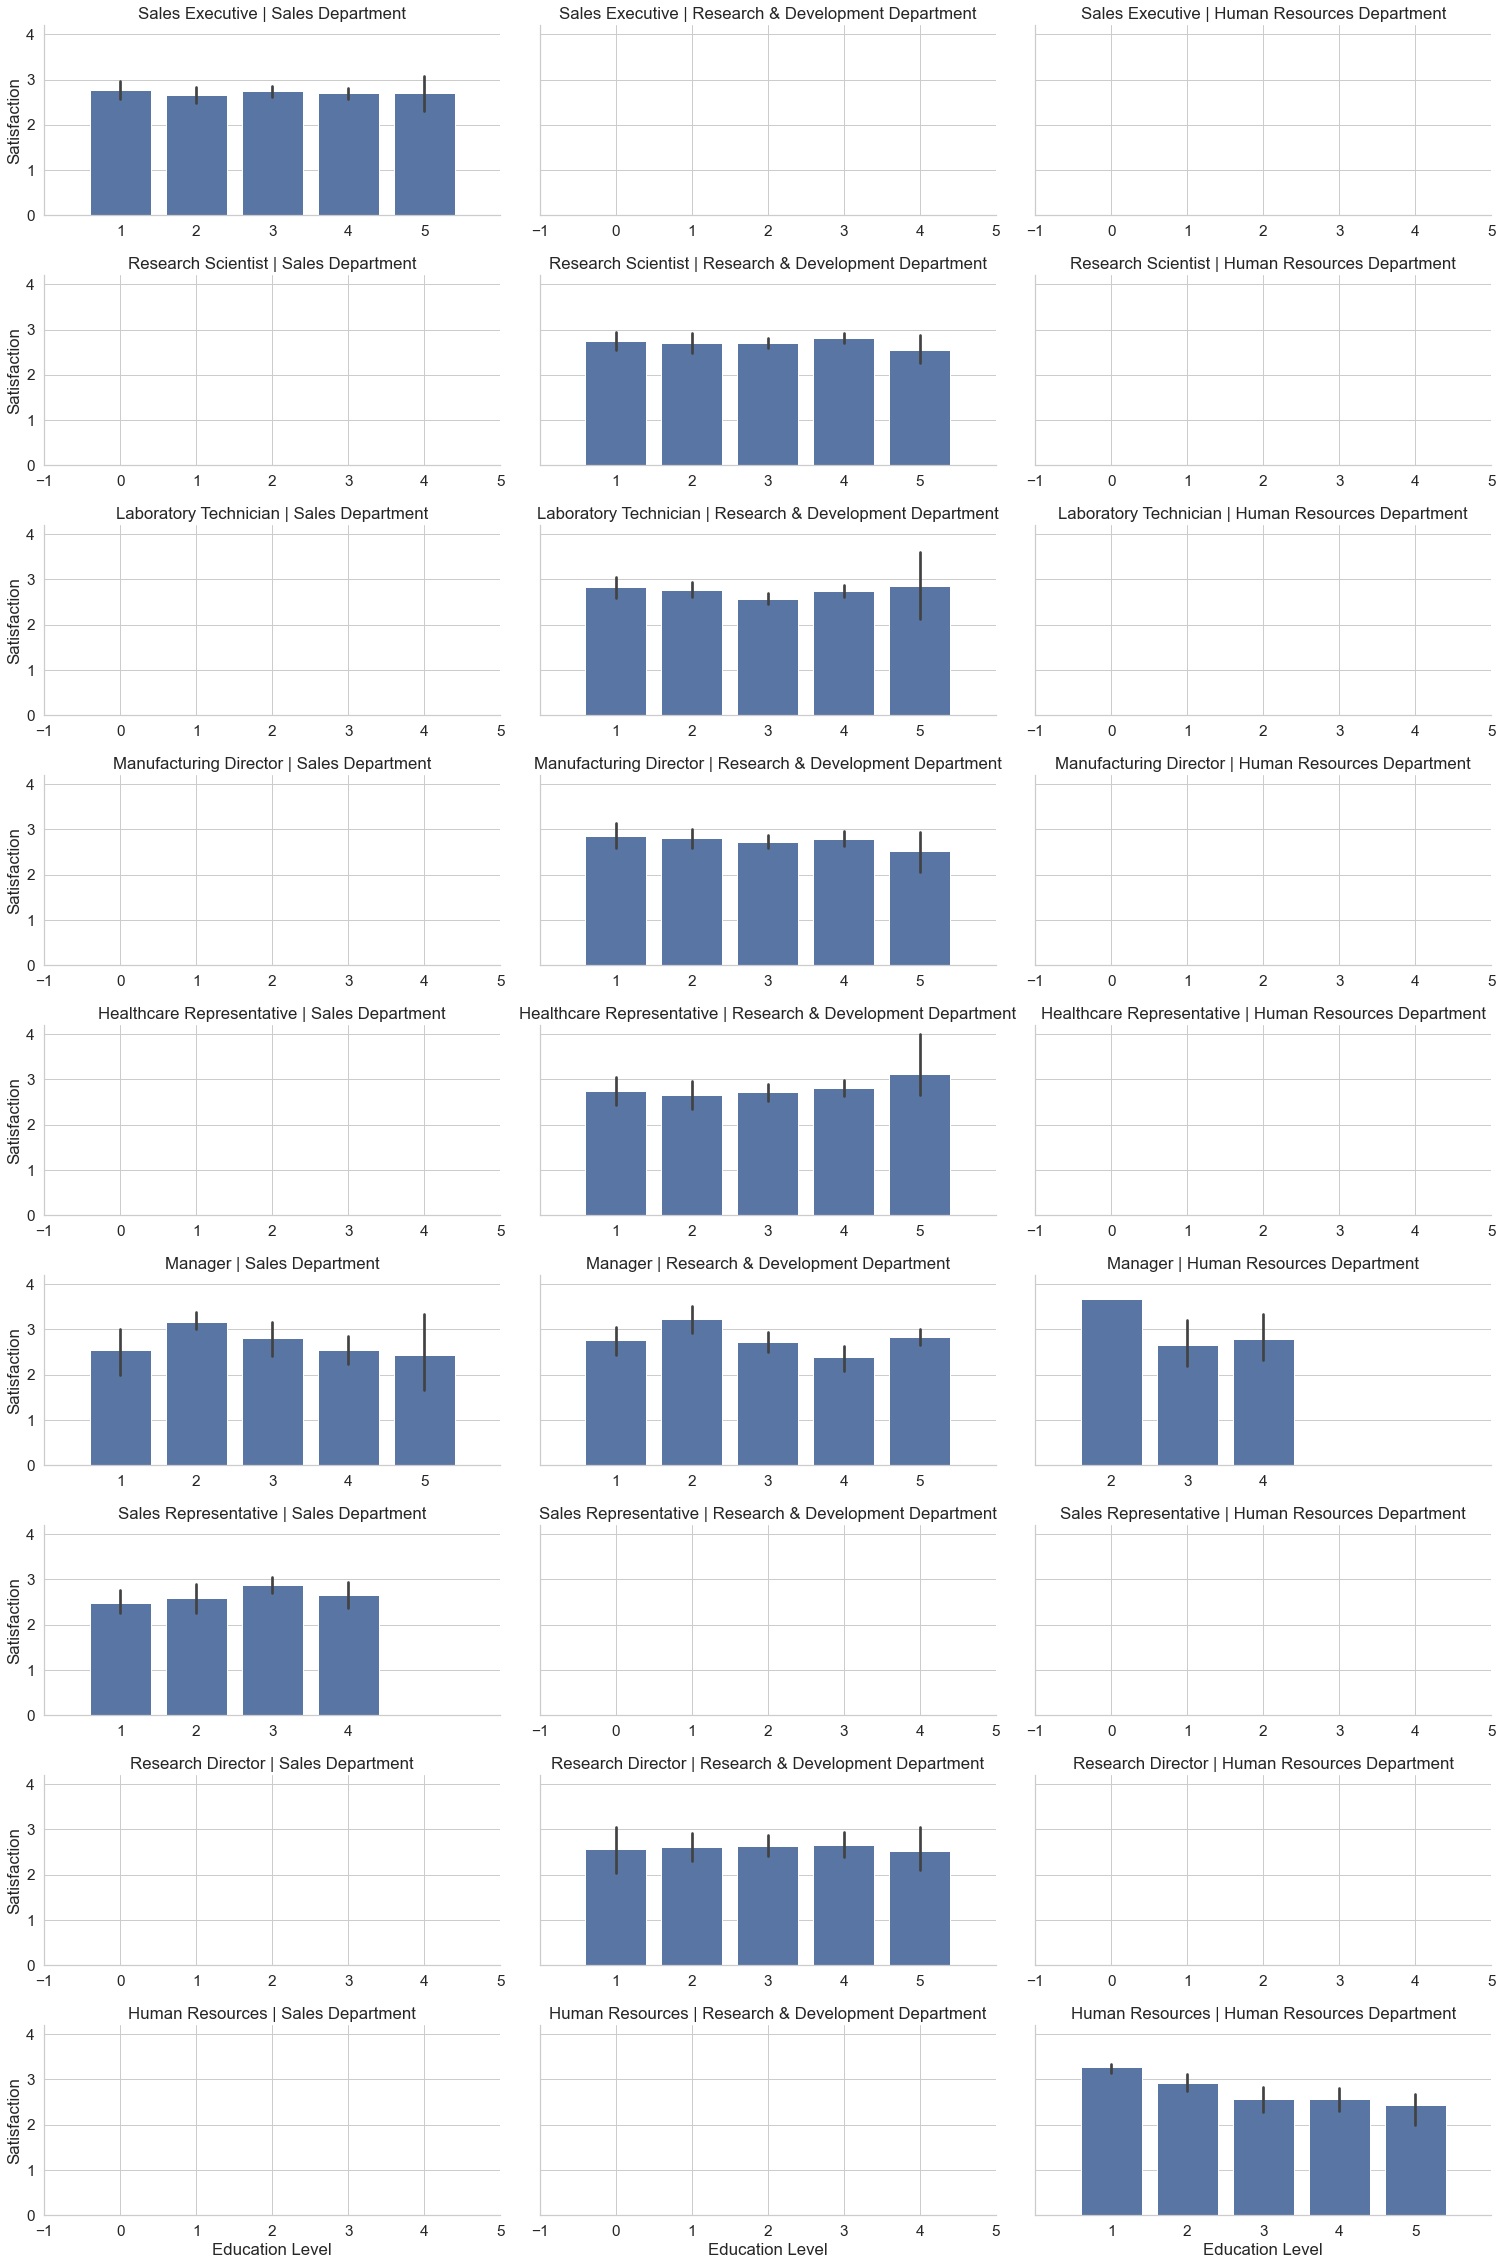

In [135]:
sns.set_theme(style="whitegrid", font_scale=1.4)
g_5 = sns.FacetGrid(df, row='JobRole', col='Department', height=3.5, aspect=2, sharex=False, palette='Blues')
g_5.map_dataframe(sns.barplot, x='Education', y='Satisfaction' )
g_5.set_titles(row_template='{row_name}', col_template='{col_name} Department')
g_5.set_axis_labels('Education Level', 'Satisfaction')
g_5.set(xlim=(-1, 5))
plt.show(g_5)

### <center> Wynagrodzenia w zależności od zajmowanego stanowiska oraz poziomu edukacji </center>

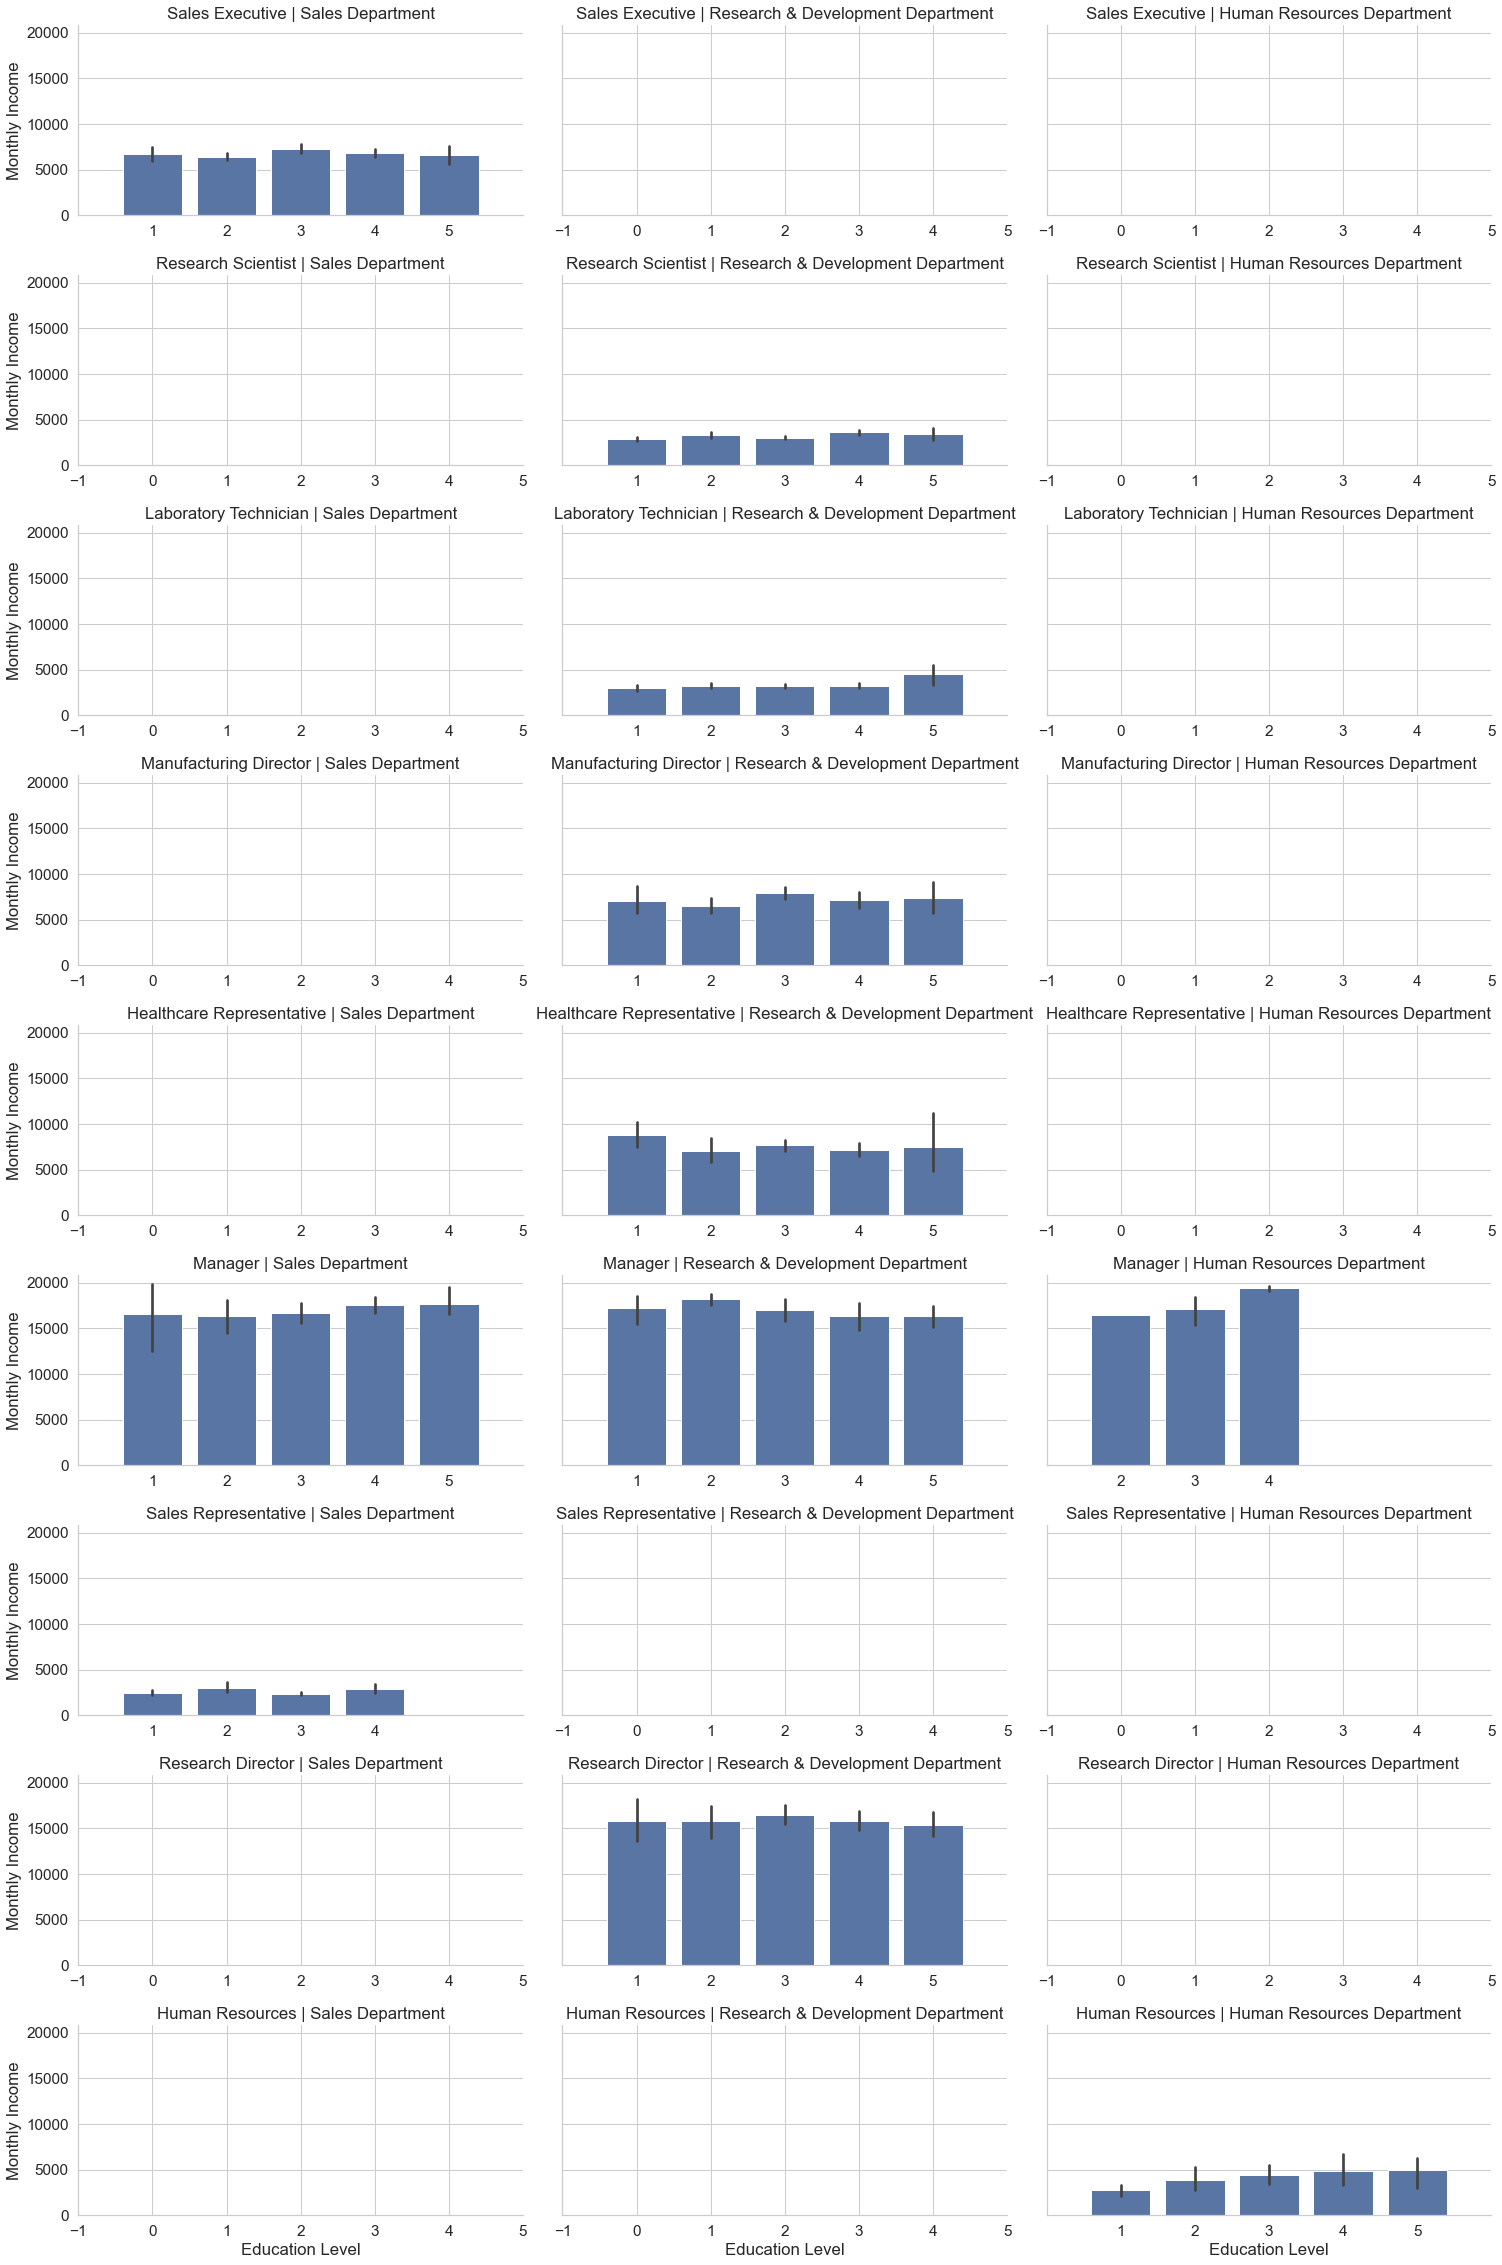

In [136]:
sns.set_theme(style="whitegrid", font_scale=1.4)
g_6 = sns.FacetGrid(df, row='JobRole', col='Department', height=3.5, aspect=2, sharex=False, palette='Blues')
g_6.map_dataframe(sns.barplot, x='Education', y='MonthlyIncome')
g_6.set_titles(row_template='{row_name}', col_template='{col_name} Department')
g_6.set_axis_labels('Education Level', 'Monthly Income')
g_6.set(xlim=(-1, 5))
plt.show(g_6)

### <center> Wynagrodzenia (rozkład) w zależności od zajmowanego stanowiska oraz działu </center>

In [128]:
def add_mean_line(data, var=None, **kws):
    
    # If no variable provided skip adding mean line
    if not var: return
    
    #Calculate mean for each group
    m = np.mean(data[var])
    
    #Get current axis
    ax = plt.gca()
    
    #add line at group mean
    ax.axvline(m, color='maroon', lw=3, ls='--')
    
    #annotate group mean
    x_pos=0.65
    if m > 5000: x_pos=0.2
    ax.text(x_pos, 0.7, f'mean={m:.0f}', 
            transform=ax.transAxes,   #transforms positions to range from (0,0) to (1,1)
            color='maroon', fontweight='bold', fontsize=12)

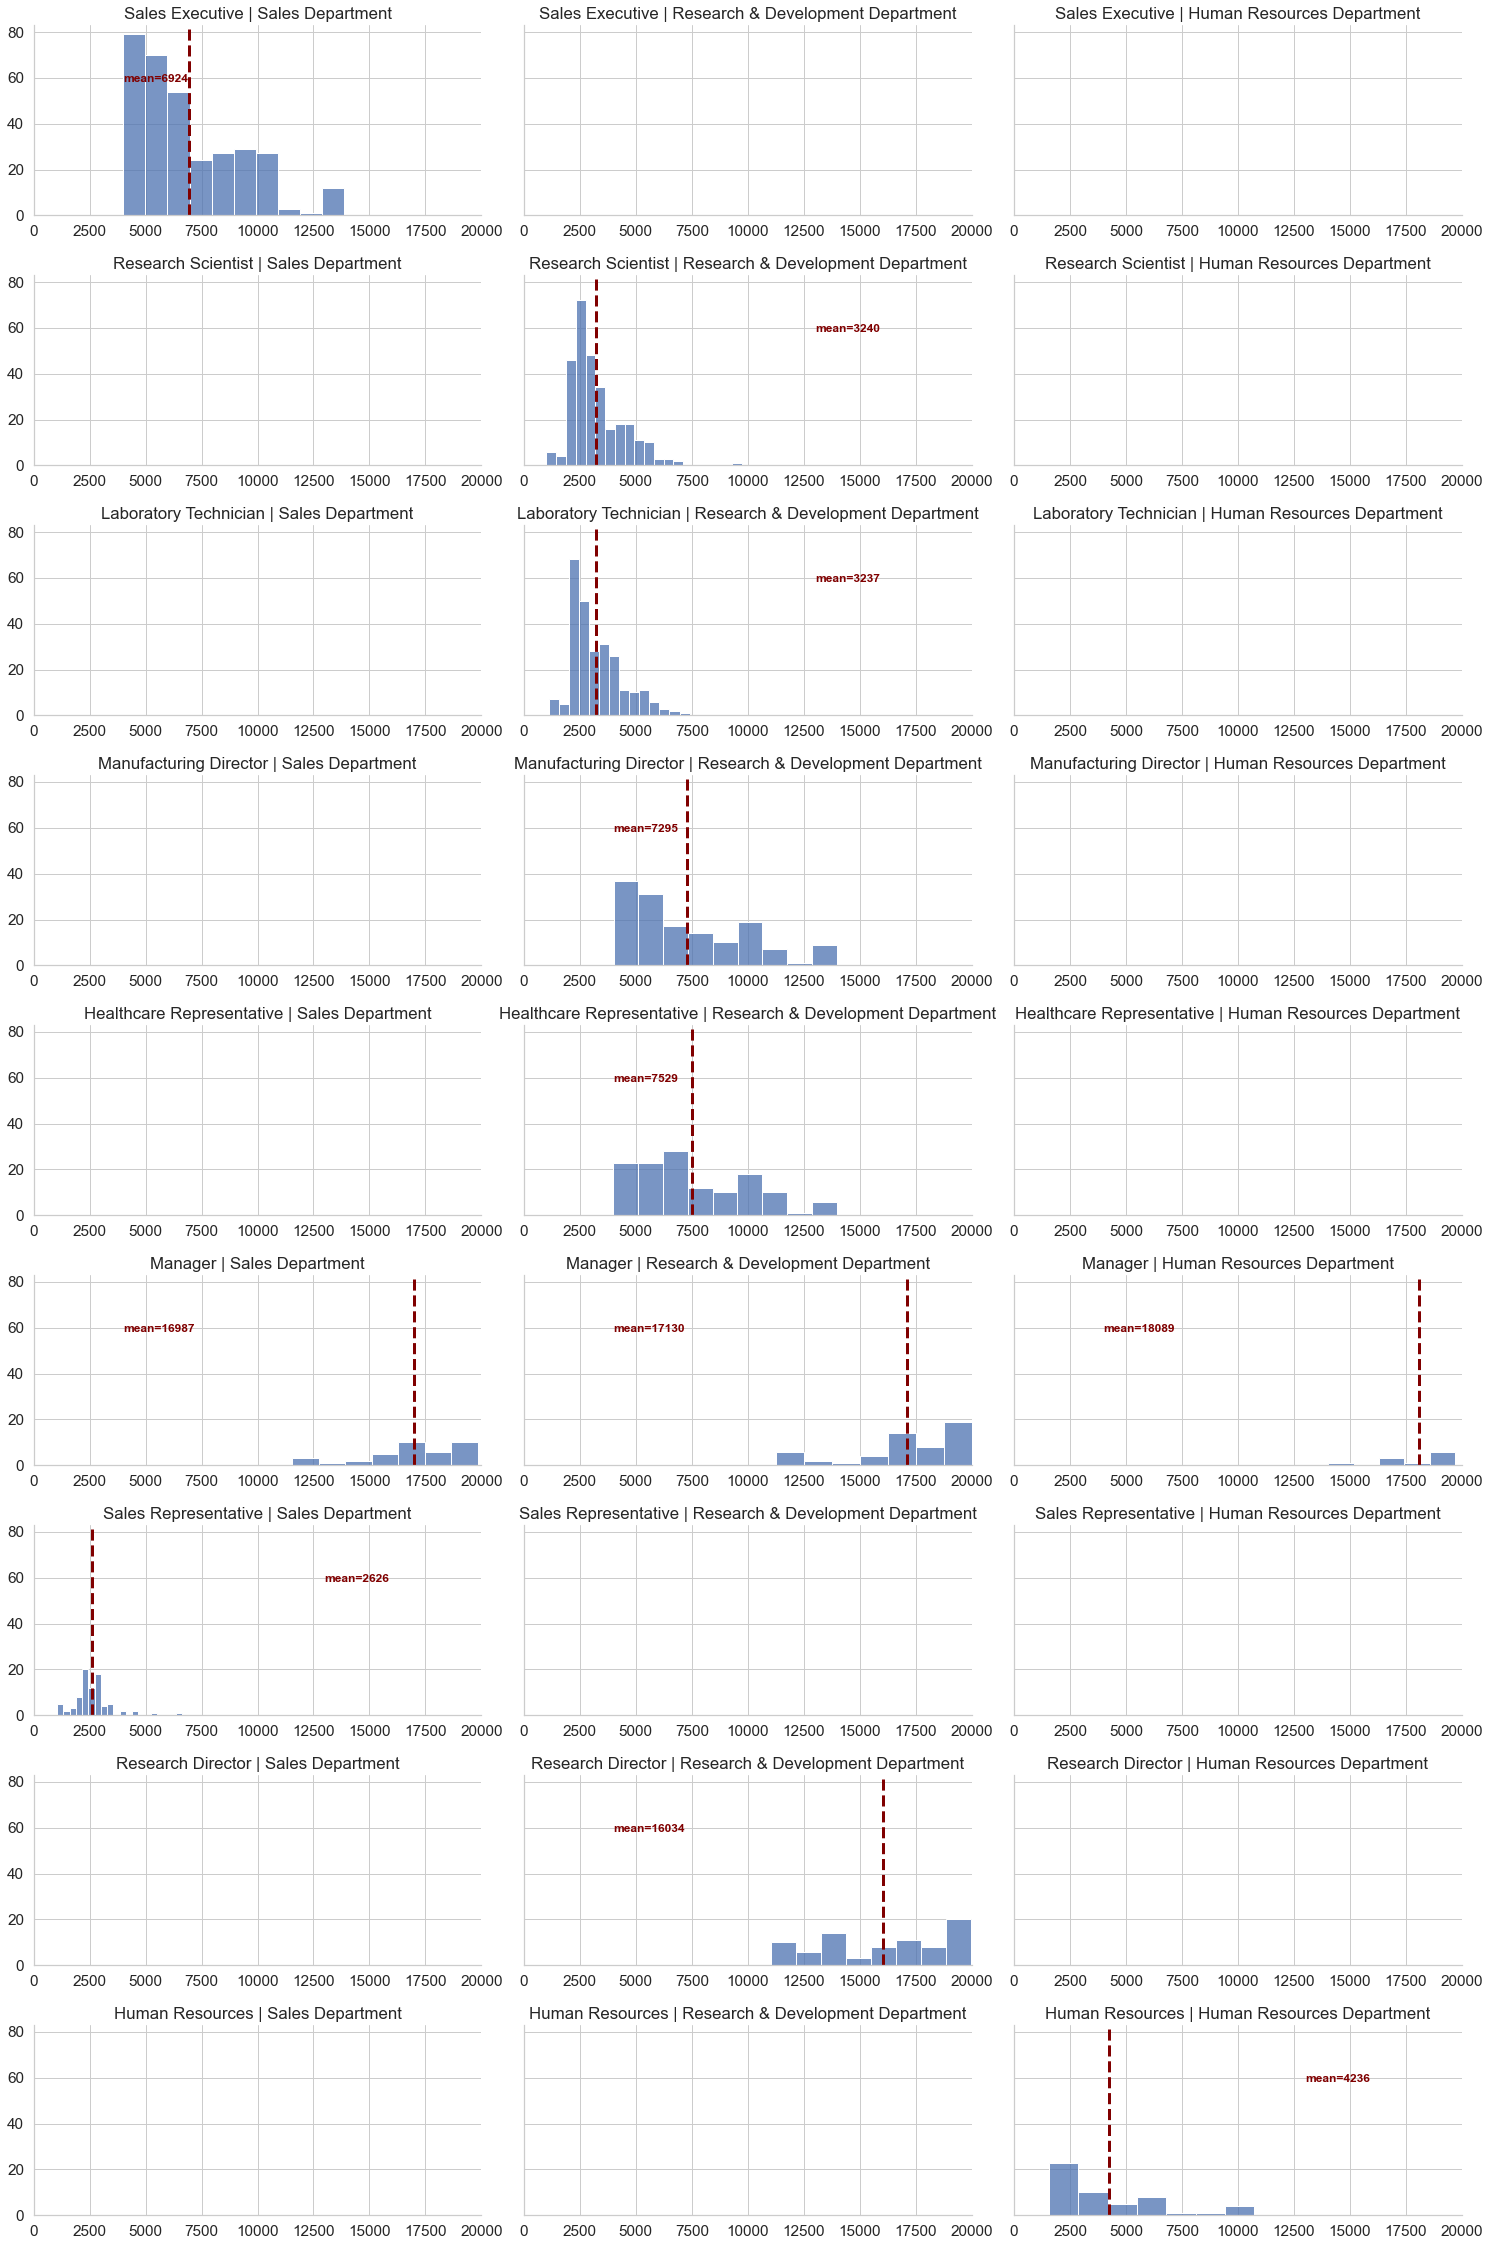

In [134]:
quantity='MonthlyIncome'

sns.set_theme(style="whitegrid", font_scale=1.4)
g_7 = sns.FacetGrid(df, row='JobRole', col='Department', height=3.5, aspect=2, sharex=False)
g_7.map_dataframe(sns.histplot, x=quantity)
g_7.map_dataframe(add_mean_line, var=quantity)
g_7.set_titles(row_template='{row_name}', col_template='{col_name} Department')
g_7.set(xlim=(0, 20000));
plt.show(g_7)

<br>

**STOP**

<br>

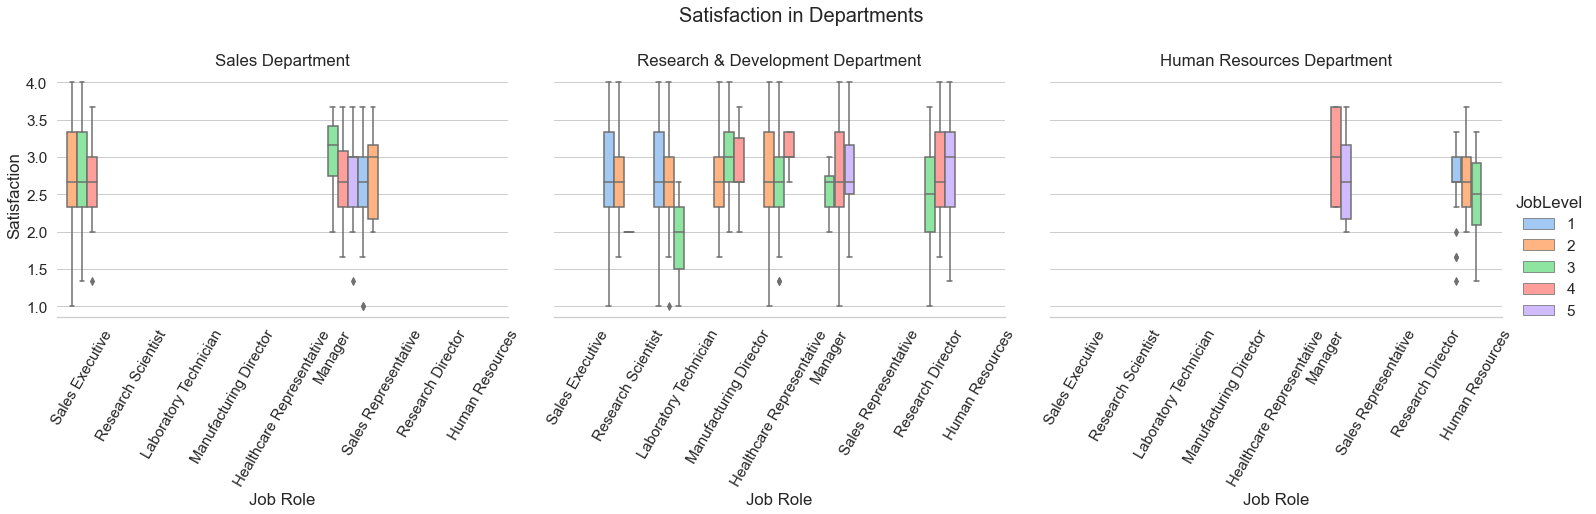

In [94]:
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.4)
g = sns.catplot(x='JobRole', y='Satisfaction', 
                data=df, 
                hue="JobLevel", 
                col='Department',
#                 col_wrap=1,
                saturation=1,
                kind="box", ci=None, aspect=1.4,
               width=1)


g.set_axis_labels("Job Role", "Satisfaction")
g.set_xticklabels(rotation=60)
g.set_xticklabels(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
                    'Manufacturing Director', 'Healthcare Representative', 'Manager',
                    'Sales Representative', 'Research Director', 'Human Resources'], fontsize=15)
g.set_titles("{col_name} {col_var}", fontsize=16)
g.despine(left=True)


g.fig.subplots_adjust(top=0.8, wspace=0.1, hspace=0.1)
g.fig.suptitle('Satisfaction in Departments', fontsize=20)

plt.show(g)



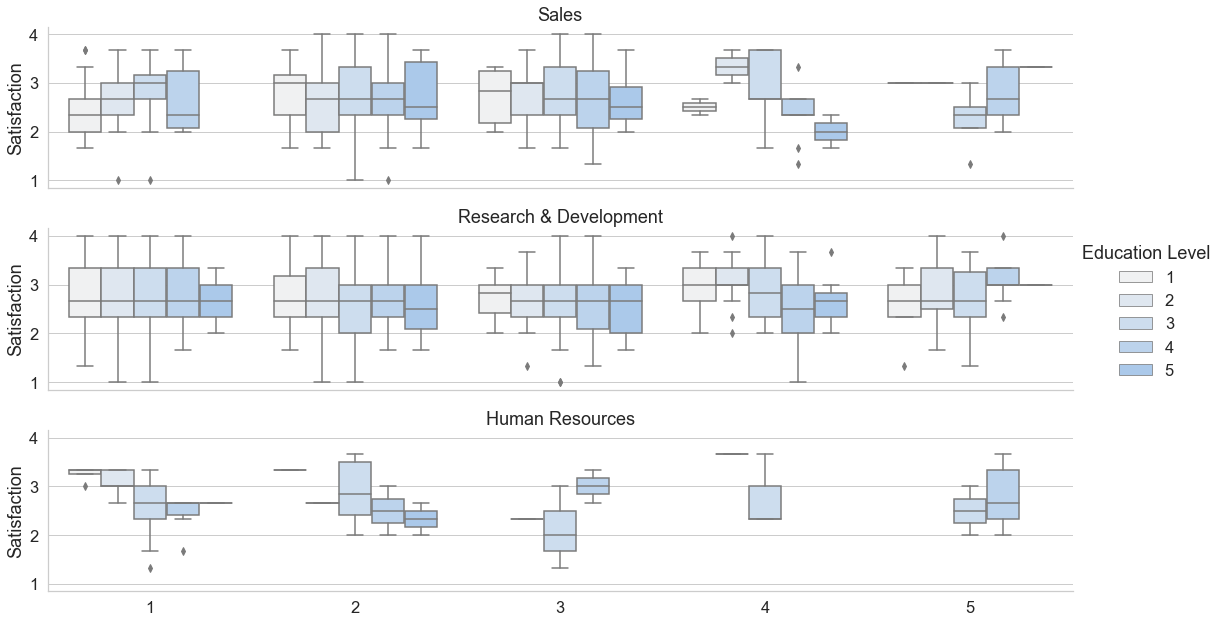

In [95]:
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.5)
g = sns.FacetGrid(df, row='Department', aspect=5)
g.map_dataframe(sns.boxplot, x='JobLevel', y='Satisfaction', hue='Education')
g.set_axis_labels('', 'Satisfaction')
g.set_titles(row_template='{row_name}')
g.add_legend(title='Education Level')


In [ ]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

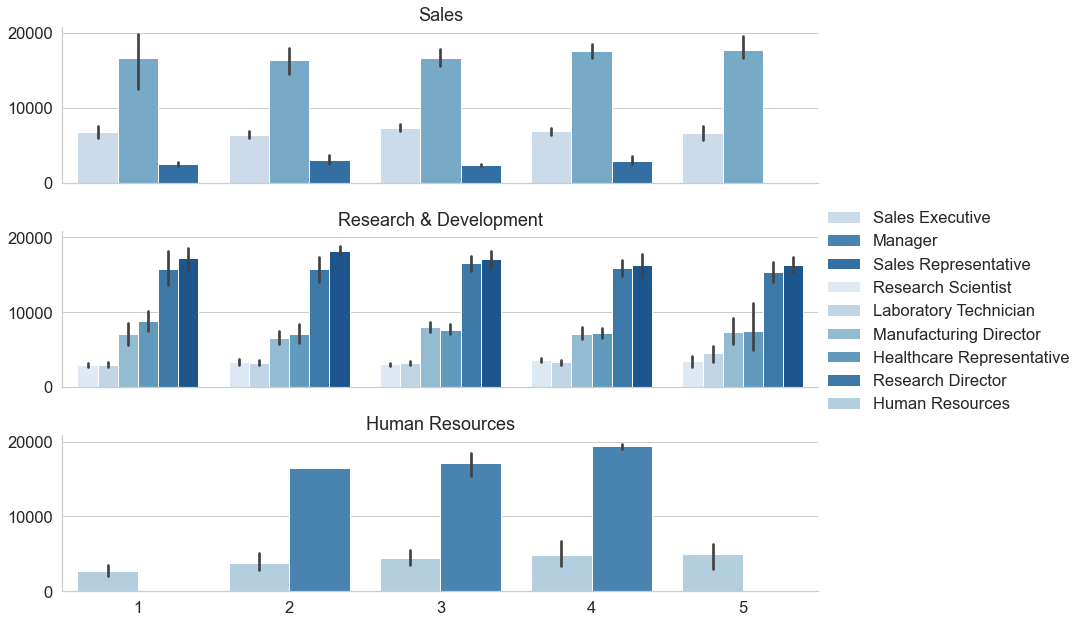

In [97]:
sns.set_theme(style="whitegrid", font_scale=1.5)
# sns.set_palette("hls")
g = sns.FacetGrid(df, row='Department', aspect=4)
g.map_dataframe(sns.barplot, x='Education', y='MonthlyIncome', hue='JobRole', palette="Blues")
g.set_titles(row_template='{row_name}')
# g.set_xticklabels(rotation=60)
# g.set_xticklabels(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
#                     'Manufacturing Director', 'Healthcare Representative', 'Manager',
#                     'Sales Representative', 'Research Director', 'Human Resources'], fontsize=15)
g.add_legend()